In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pathlib
from plotnine import *
from plotnine.data import *
import plotnine
import numpy as np
import plotnine as gg
import pandas as pd
import numpy as np

In [3]:
path_bike_df = pathlib.Path("../data/raw/hour.csv")

In [139]:
bike_df = pd.read_csv(path_bike_df)

In [140]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [141]:
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [142]:
bike_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
dteday,17379,731,2011-11-11,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379,NaN,NaN,NaN,2.50164,1.10692,1,2,3,3,4
yr,17379,NaN,NaN,NaN,0.502561,0.500008,0,0,1,1,1
mnth,17379,NaN,NaN,NaN,6.53778,3.43878,1,4,7,10,12
hr,17379,NaN,NaN,NaN,11.5468,6.91441,0,6,12,18,23
holiday,17379,NaN,NaN,NaN,0.0287704,0.167165,0,0,0,0,1
weekday,17379,NaN,NaN,NaN,3.00368,2.00577,0,1,3,5,6
workingday,17379,NaN,NaN,NaN,0.682721,0.465431,0,0,1,1,1
weathersit,17379,NaN,NaN,NaN,1.42528,0.639357,1,1,1,2,4


In [134]:
bike_df.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
target        17379
dtype: int64

In [144]:
le_cnt = LabelEncoder()
le_season = LabelEncoder()
le_holiday =LabelEncoder()
le_weekday = LabelEncoder()
le_weathersit = LabelEncoder()
le_workingday = LabelEncoder()
le_mnth = LabelEncoder()
le_hr = LabelEncoder()

In [145]:
bike_df["target"] = le_cnt.fit_transform(bike_df["cnt"])
bike_df["season.cat"] = le_season.fit_transform(bike_df["season"])
bike_df["holiday.cat"] = le_holiday.fit_transform(bike_df["holiday"])
bike_df["weekday.cat"] = le_weekday.fit_transform(bike_df["weekday"])
bike_df["weathersit.cat"] = le_weathersit.fit_transform(bike_df["weathersit"])
bike_df["tworkingday.cat"] = le_workingday.fit_transform(bike_df["workingday"])
bike_df["mnth.cat"] = le_mnth.fit_transform(bike_df["mnth"])

In [146]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,target,season.cat,holiday.cat,weekday.cat,weathersit.cat,tworkingday.cat,mnth.cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,15,0,0,6,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,39,0,0,6,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,31,0,0,6,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,12,0,0,6,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,0,0,0,6,0,0,0


In [147]:
bike_df["target"].describe()

count    17379.000000
mean       187.961275
std        179.707814
min          0.000000
25%         39.000000
50%        141.000000
75%        280.000000
max        868.000000
Name: target, dtype: float64

In [148]:
bike_data_df = bike_df.drop(['cnt','season','holiday','weekday','weathersit','workingday','mnth'], axis=1)

In [149]:
bike_data_df.shape

(17379, 17)

In [150]:
bike_df.shape

(17379, 24)

In [151]:
set(bike_df.columns).difference(bike_data_df.columns)

{'cnt', 'holiday', 'mnth', 'season', 'weathersit', 'weekday', 'workingday'}

In [153]:
X = bike_data_df.drop('target', axis=1)
y = bike_data_df['target']

In [154]:
seed = 111

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

In [165]:
X_train.head()

,instant,dteday,yr,hr,temp,atemp,hum,windspeed,casual,registered,season.cat,holiday.cat,weekday.cat,weathersit.cat,tworkingday.cat,mnth.cat
299,300,2011-01-13,0,22,0.14,0.1212,0.46,0.3284,0,30,0,0,4,0,1,0
10511,10512,2012-03-19,1,2,0.46,0.4545,0.88,0.1642,1,7,0,0,1,0,1,2
6571,6572,2011-10-06,0,9,0.46,0.4545,0.63,0.1940,20,188,3,0,4,0,1,9
9341,9342,2012-01-30,1,3,0.24,0.2273,0.48,0.1940,0,4,0,0,1,0,1,0
4196,4197,2011-06-28,0,18,0.80,0.7576,0.55,0.2985,68,436,2,0,2,2,1,5


In [166]:
np.mean(y_train)

188.03418629840237

In [167]:
np.mean(y_test)

187.548139624089

In [168]:
df_train = pd.concat([X_train, pd.DataFrame({"target": y_train})], axis=1)

In [169]:
df_train.head()

,instant,dteday,yr,hr,temp,atemp,hum,windspeed,casual,registered,season.cat,holiday.cat,weekday.cat,weathersit.cat,tworkingday.cat,mnth.cat,target
299,300,2011-01-13,0,22,0.14,0.1212,0.46,0.3284,0,30,0,0,4,0,1,0,29
10511,10512,2012-03-19,1,2,0.46,0.4545,0.88,0.1642,1,7,0,0,1,0,1,2,7
6571,6572,2011-10-06,0,9,0.46,0.4545,0.63,0.1940,20,188,3,0,4,0,1,9,207
9341,9342,2012-01-30,1,3,0.24,0.2273,0.48,0.1940,0,4,0,0,1,0,1,0,3
4196,4197,2011-06-28,0,18,0.80,0.7576,0.55,0.2985,68,436,2,0,2,2,1,5,503


In [170]:
df_test = pd.concat([X_test, pd.DataFrame({"target": y_test})], axis=1)

In [171]:
df_train.shape

(14772, 17)

In [172]:
df_test.shape

(2607, 17)

In [173]:
list(df_train.columns)

['instant',
 'dteday',
 'yr',
 'hr',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'season.cat',
 'holiday.cat',
 'weekday.cat',
 'weathersit.cat',
 'tworkingday.cat',
 'mnth.cat',
 'target']

In [131]:
bike_df['dteday'] = pd.to_datetime(bike_df.dteday)

In [132]:
bike_df['season'] = bike_df.season.astype('category')
bike_df['holiday'] = bike_df.holiday.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['weathersit'] = bike_df.weathersit.astype('category')
bike_df['workingday'] = bike_df.workingday.astype('category')
bike_df['mnth'] = bike_df.mnth.astype('category')
bike_df['hr'] = bike_df.hr.astype('category')

In [75]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','holiday','weekday','weathersit','workingday','mnth','hr']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Sezonas')]

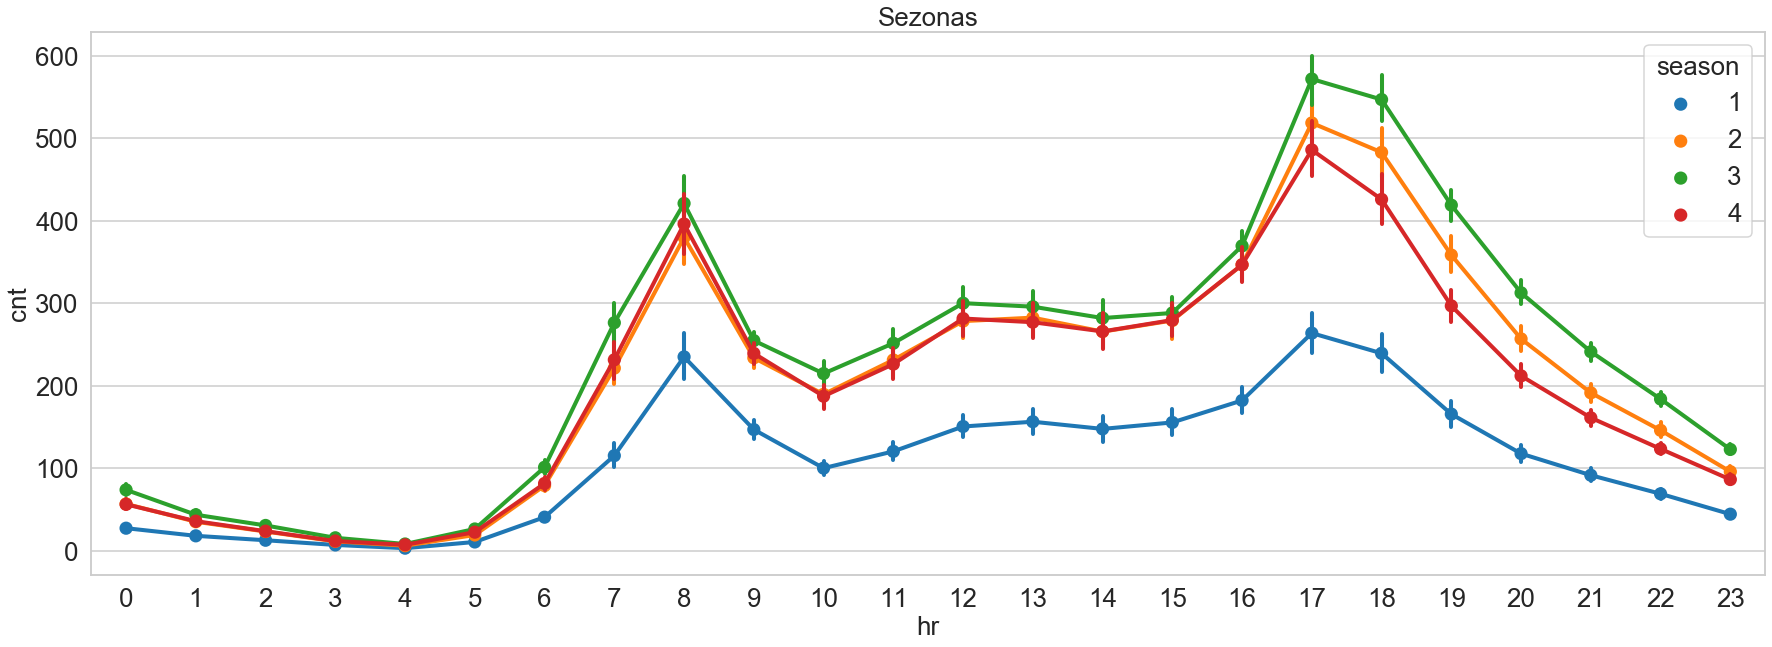

In [14]:
fig,ax = plt.subplots()
sns.pointplot(data=bike_df[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Sezonas")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

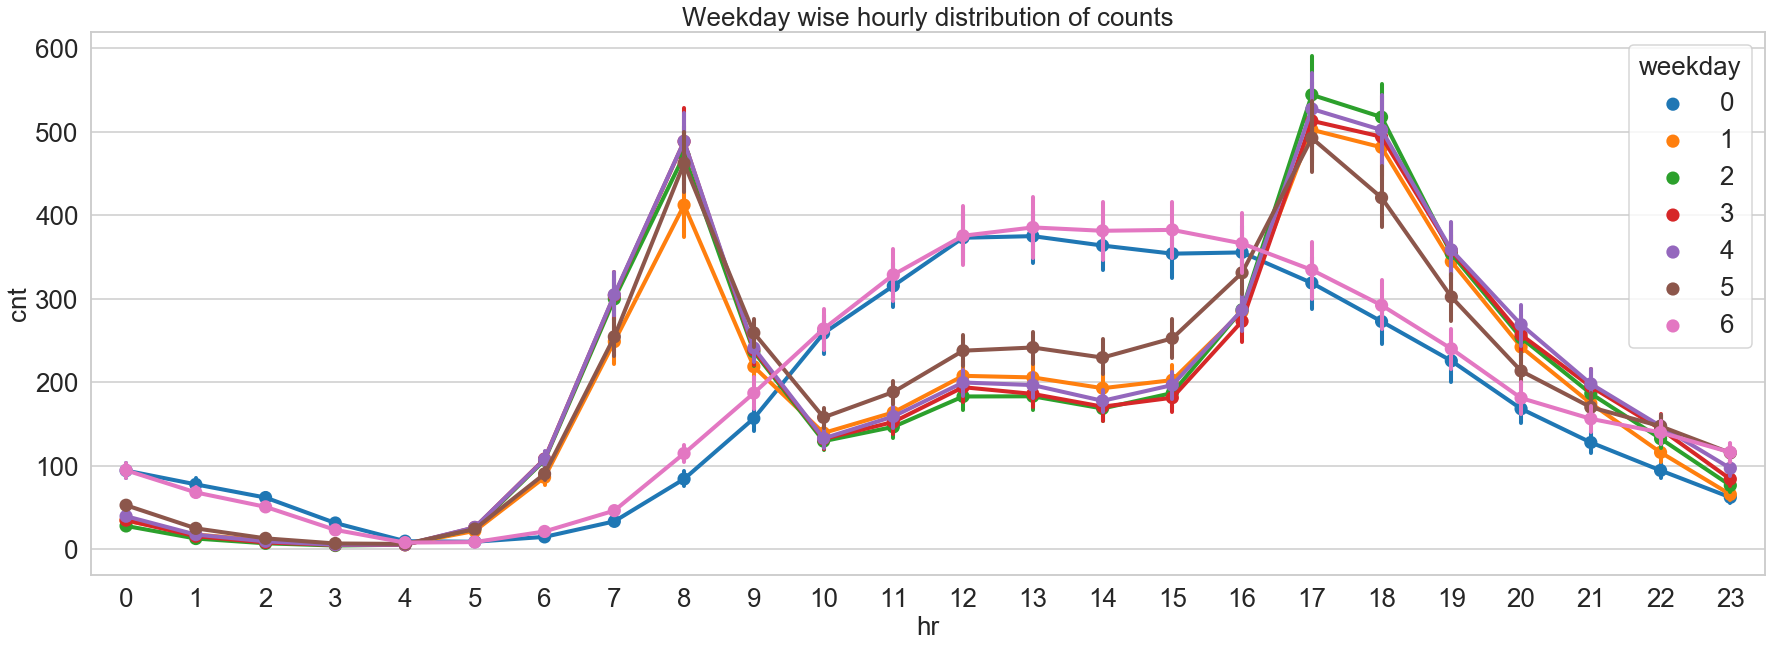

In [15]:
fig,ax = plt.subplots()
sns.pointplot(data=bike_df[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

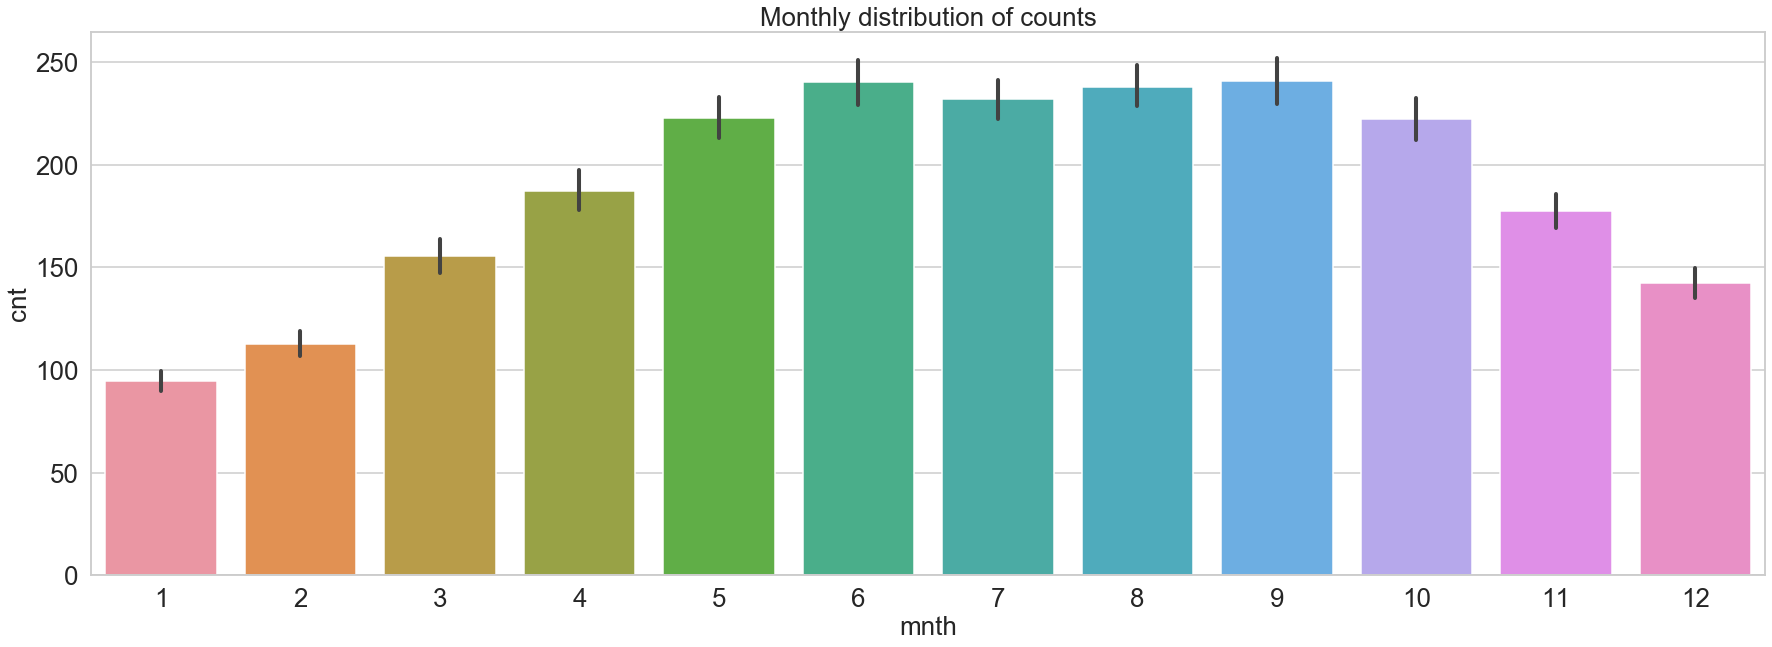

In [18]:
fig,ax = plt.subplots()
sns.barplot(data=bike_df[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")

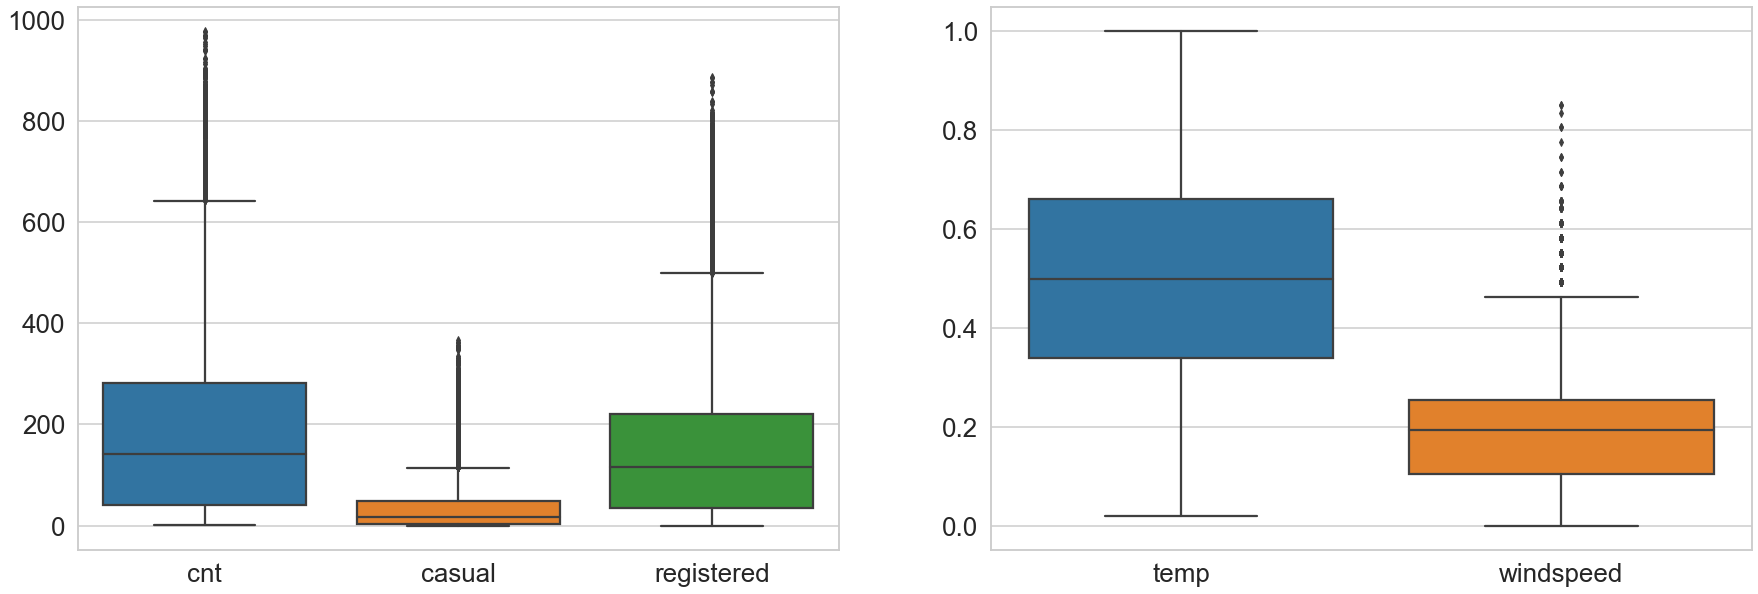

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=bike_df[['cnt',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=bike_df[['temp',
                          'windspeed']],ax=ax2)

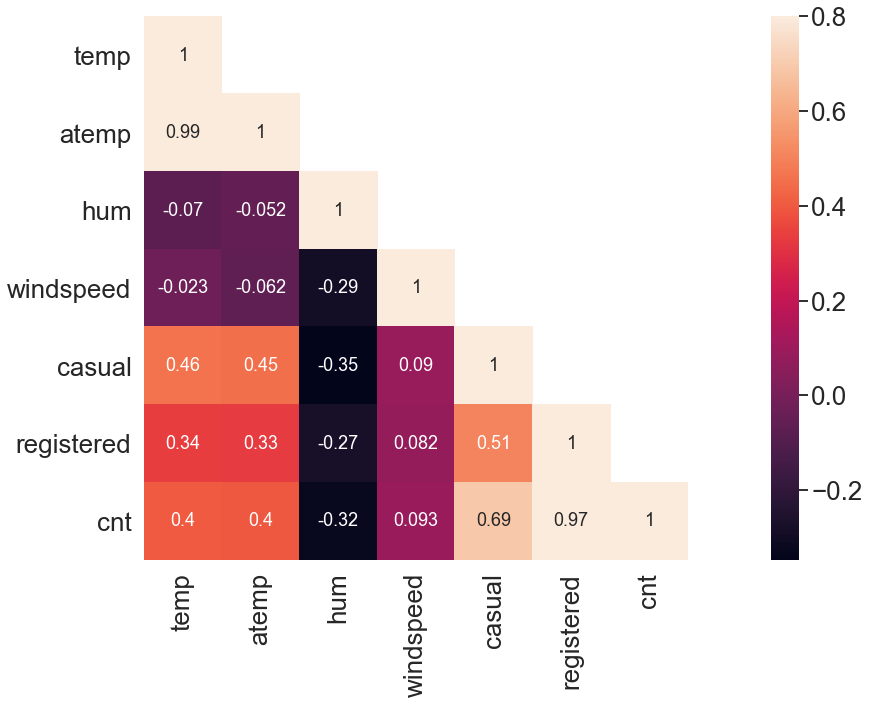

In [22]:
corrMatt = bike_df[['temp',
                    'atemp', 
                    'hum', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'cnt']].corr()
mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)